In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import altair as alt
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
# load data
df = pd.read_csv('../data/BGL_cleaned.csv')

In [3]:
df.head()

,id,time,unknown1,exact_time,unknown2,info,label
0,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.363779,R02-M1-N0-C:J12-U11,ras kernel info instruction cache parity error...,Normal
1,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.527847,R02-M1-N0-C:J12-U11,ras kernel info instruction cache parity error...,Normal
2,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.675872,R02-M1-N0-C:J12-U11,ras kernel info instruction cache parity error...,Normal
3,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.823719,R02-M1-N0-C:J12-U11,ras kernel info instruction cache parity error...,Normal
4,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.982731,R02-M1-N0-C:J12-U11,ras kernel info instruction cache parity error...,Normal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4747963 entries, 0 to 4747962
Data columns (total 7 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   id          int64 
 1   time        object
 2   unknown1    object
 3   exact_time  object
 4   unknown2    object
 5   info        object
 6   label       object
dtypes: int64(1), object(6)
memory usage: 253.6+ MB


In [5]:
# count for each labels
count = df['label'].value_counts().tolist()
labels = columns=df['label'].unique()
count_labels = pd.DataFrame({'labels': labels, 'count': count})

# bar plot for each label
bars = alt.Chart(count_labels).mark_bar().encode(
    x='count:Q',
    y="labels:O"
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='count:Q'
)

(bars + text).properties(height=200)

alt.LayerChart(...)

In [6]:
vectorizer = CountVectorizer(max_features=200)
X_counts = vectorizer.fit_transform(df['info'])

In [7]:
bow_df = pd.DataFrame(
    X_counts.toarray(), columns=vectorizer.get_feature_names_out(), index=df["label"]
)
bow_df.head()

,ac,active,address,alerts,alignment,allreduce,app,apps,asic,assembly,...,tlb,torus,total,tree,type,urgent,vnm,volt,vpd,warning
label,,,,,,,,,,,,,,,,,,,,,
Normal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Normal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Normal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Normal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Normal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
count_df = bow_df.reset_index().groupby('label').sum()
count_df.head()

,ac,active,address,alerts,alignment,allreduce,app,apps,asic,assembly,...,tlb,torus,total,tree,type,urgent,vnm,volt,vpd,warning
label,,,,,,,,,,,,,,,,,,,,,
Anomaly,0,0,0,0,0,0,63845,0,0,0,...,152735,12,4751,6148,18178,0,0,0,0,0
Normal,20895,69719,119946,17341,588055,22528,164691,77116,17513,17309,...,296,34560,309330,15083,13626,29952,25090,35026,44501,34585


In [9]:
plot_anomaly = count_df.T.reset_index().sort_values("Anomaly", ascending=False).iloc[0:40,]
plot_normal = count_df.T.reset_index().sort_values("Normal", ascending=False).iloc[0:40,]

a = alt.Chart(plot_anomaly).mark_bar().encode(
    x=alt.X('index:N', sort='-y', title = 'key words'),
    y= alt.Y('Anomaly:Q',scale=alt.Scale(domain=[0, 4500000]))
).properties(width=600,height=300)
n = alt.Chart(plot_normal).mark_bar().encode(
    x=alt.X('index:N', sort='-y',title = 'key words'),
    y= alt.Y('Normal:Q')
).properties(width=600,height=300)

a | n

alt.HConcatChart(...)

In [10]:
anomaly = df[df['label'] == 'Anomaly']
normal = df[df['label'] == 'Normal']

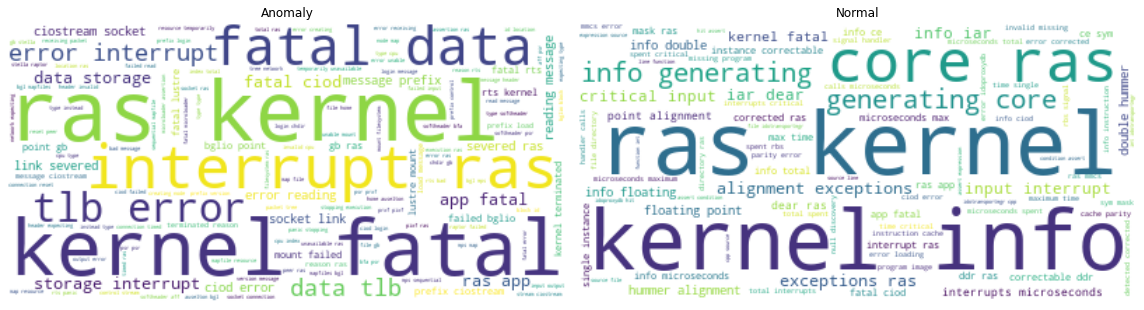

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,15))
text = " ".join(str(i) for i in anomaly['info'])

wordcloud = WordCloud(background_color="white").generate(text)
axes[0].imshow(wordcloud, interpolation='bilinear')
axes[0].axis("off")
axes[0].set_title("Anomaly")

text = " ".join(str(i) for i in normal['info'])
wordcloud = WordCloud(background_color="white").generate(text)
axes[1].imshow(wordcloud, interpolation='bilinear')
axes[1].axis("off")
axes[1].set_title("Normal")
fig.tight_layout()